# NKIS policy report data cleaning

## report ~ 2018

In [25]:
import pandas as pd
import numpy as np

In [35]:
report_2018 = pd.read_excel('../Data/NKIS_raw/NKIS_190510.xlsx')
report_2018 = report_2018.rename(columns={"보고서명": "Title", "영문보고서명": "English title",
                            "등록기관": "Institute","출판년도": "Year","연구유형": "Type","연구책임자명": "Responsibility",
                            "내부연구참여자":"Internal Author","외부연구참여자":"External Author", "국문초록":"Abstract", "핵심키워드":"Keywords"})
report_2018.head()

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords
0,21세기 생물산업 창조를 향한 일본 정부의 기본전략과 프로젝트,NaN,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,NaN,NaN,지금까지 경제구조의 변혁과 창조를 위한 행동계획(1997년 5월 16일 각료회의 결...,"바이오테크놀로지산업,21세기,생물산업,창조,일본 정부,기본전략,프로젝트"
1,EU의 연구개발 정책동향,R&D Policy Trends in the EU,과학기술정책연구원,2000,기본연구보고서,과학기술,과학기술일반,정성철,과학기술정책연구원,NaN,NaN,NaN,NaN,NaN,"EU는 미국, 일본과 함께 세계 과학기술 발전을 주도하고 있는 국가군으로써, OEC...","EU,연구개발,정책동향"
2,PBS의 관련 개념과 적용조건,NaN,과학기술정책연구원,2000,기본연구보고서,경제,예산,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,NaN,NaN,1990년대 접어들면서 세계시장의 경쟁환경이 점점 심화됨에 따라 국가경쟁력을높이기 ...,"PBS,개념,적용조건"
3,R&D 평가시스템의 이론적 체계 구축 및 적용방안에 관한 연구,A Framework for R&D Evaluation System and Its ...,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,이정원,과학기술정책연구원,NaN,NaN,NaN,NaN,NaN,본 연구는 연구개발활동뿐 아니라 연구개발 평가 자체의 효율성을 높이고 그 결과가 효...,"R&D 평가시스템,이론적 체계 구축,적용방안"
4,개방형·모듈형 기술패러다임에 대응한 기술혁신전략 - 리눅스를 중심으로,NaN,과학기술정책연구원,2000,기본연구보고서,방송·통신·정보,정보,송위진,과학기술정책연구원,NaN,NaN,NaN,NaN,NaN,"인터넷의 발전과 리눅스의 확산에 따라 기술개발 환경에 개방화(openness) , ...","개방형·모듈형,기술패러다임,기술혁신,리눅스"


## Data cleaning

### Removing missing values 

#### report~2018

In [27]:
report_2018[report_2018['Title'].isna()]

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords


There is no nan title data

In [28]:
report_2018[report_2018['Abstract'].isna()].head()

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords
45,Human Resource Development towards Knowledge -...,Human Resource Development towards Knowledge -...,과학기술정책연구원,2000,기본연구보고서,노동,인적자원개발,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,NaN,NaN,NaN,"지식기반경제,인적자원,개발"
70,Inter-City Networking Strategy in the Yellow S...,Inter-City Networking Strategy in the Yellow S...,국토연구원,2000,기본연구보고서,국제통상 및 외교안보,국제협력 및 국제문제,Kim Won Bae,국토연구원,NaN,NaN,NaN,NaN,NaN,NaN,"Inter-City,Networking,Strategy,Yellow Sea Sub-..."
124,Inter-City Networking Sterategy in the Yellow ...,Inter-City Networking Sterategy in the Yellow ...,국토연구원,2000,기본연구보고서,국토개발,국토개발일반,김원배,국토연구원,NaN,NaN,NaN,NaN,NaN,NaN,Yellow Sea Sub-Region
126,Foreign Exchange Market Liberalization: The Ca...,Foreign Exchange Market Liberalization: The Ca...,대외경제정책연구원,2000,기본연구보고서,경제,금융,Chae-Shick Chung,대외경제정책연구원,NaN,NaN,NaN,NaN,"Doo Yong Yang,Sangyoung Joo,",NaN,"market,liberalization,korea"
144,APEC Forum on Shared Prosperity and Harmony,APEC Forum on Shared Prosperity and Harmony,대외경제정책연구원,2000,기본연구보고서,국제통상 및 외교안보,국제협력 및 국제문제,Kyung Tae Lee,대외경제정책연구원,NaN,NaN,NaN,NaN,NaN,NaN,경제협력


remove nan abstract

In [43]:
report_2018 = report_2018[report_2018['Abstract'].notna()]
report_2018[report_2018['Abstract'].isna()].head()

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords


In [30]:
report_2018['Abstract'].astype(str)
# report_2018['Abstract'] = report_2018['Abstract'].apply(lambda x: np.nan if (x == "") else x)

0        지금까지 경제구조의 변혁과 창조를 위한 행동계획(1997년 5월 16일 각료회의 결...
1        EU는 미국, 일본과 함께 세계 과학기술 발전을 주도하고 있는 국가군으로써, OEC...
2        1990년대 접어들면서 세계시장의 경쟁환경이 점점 심화됨에 따라 국가경쟁력을높이기 ...
3        본 연구는 연구개발활동뿐 아니라 연구개발 평가 자체의 효율성을 높이고 그 결과가 효...
4        인터넷의 발전과 리눅스의 확산에 따라 기술개발 환경에 개방화(openness) , ...
                               ...                        
21579    본 연구에서는 다양한 생태계의 보전 및 생물다양성 보전과 증진을 통한 생태계의 지속...
21580    본 연구는 가뭄지역의 농촌용수 개발계획을 친환경적이고 지속가능한 이수 방안으로 수립...
21581    고리 1호기의 영구 정지 및 해체 확정에 이어 월성 1호기는 조기 폐쇄 결정을 내린...
21582    그동안 우리나라 하천의 관리와 재정투자는 대하천 위주로 추진되어 왔다. 이러한 대하...
21583    본 과제는 다양하고 복합적인 환경-경제-사회적 피해를 최소화하기 위하여 적극적인 대...
Name: Abstract, Length: 20922, dtype: object

### Revise tpyo

In [64]:
typolist = 'ㄲㄸㅃㅆㅉㅏㅑㅓㅕㅗㅛㅜㅣㅐㅒㅔㅖㅘㅙㅚㅝㅞㅟㅢ'

def intersect(abst): 
    common = []

    for char in set(typolist):
        common.extend(char * min(abst.count(char), typolist.count(char)))
    if len(common)>0:
        return common
    else:
        return False
    

In [66]:
for ind in report_2018.index:
    if intersect(report_2018['Abstract'][ind]):
        print(intersect(report_2018['Abstract'][ind]),ind)

['ㅗ'] 286
['ㅣ'] 1492
['ㅣ', 'ㅆ', 'ㅜ'] 1863
['ㅆ'] 2764
['ㅆ'] 2773
['ㅓ'] 2781
['ㅣ'] 4153
['ㅜ'] 6438
['ㅜ'] 7105
['ㅣ'] 7997
['ㅣ'] 8765
['ㅣ'] 8767
['ㅣ'] 8768
['ㅘ'] 9365


In [80]:
report_2018['Abstract'][286] = '우리가 살고 있는 현재의 에너지 사용과 앞으로의 에너지 사용은 어떻게 변화 하게 될 것인가를 그려보는 것은 매우 흥미로운 작업일 수 있다. 미래의 에너지의 모습은 무엇일까?_x000D_\n 상상하기 가장 쉬운 모습은 에너지의 가격이 저렴하여야 할 것이고, 환경친화적이고, 편리하게 사용할 수 있는 에너지가 다양하게 존재할 수 있어야 할 것이다. 또한 , 그러한 에너지를 _x000D_\n사용하는데 어떠한 장애나 불편함이 없어야 할 것이다. 이러한 모습의 에너지는 나타날 수 있는 것일까? 어떻게 가능할 수 있을까? 이러한 모습이 과연 우리의 앞에 나타나게 하기 위해서는 우리는 무엇을 하여야 할까? 이 장뿐만 아니라 책 전반에 걸쳐 이러한 에너지의 모습을 위한 정책의 방향과 산업의 전환을 기술할 것이다. 이에 앞서 여기서는 우리 에너지의 양적 모습에 대하여 지나온 1990년대와 앞으로 다가올 2000년대의 모습을 어렴풋이 나마 그려보고자 한다.'


report_2018['Abstract'][1492] = '이 연구는 행정정보의 디지털화에 따라 전자행정 관련 기존법제의 정비를 위해 기획된 것이다._x000D_\n 좁은 의미의 전자정부라는 것은 행정업무의 효율성 향상, 정보 공개, 대민 서비스 향상을 목표로 하고, 정부 행정부문 내 및 국민과 기업 등 민간부문과의 정보화 네트워크화를 의미한다고 생각된다. 그것은 당연한 것으로 정부 행정부문에 있어서 업무 및 조직의 기본방향에 변혁을 주고 있다. 또한 구미제국 등에서 보는 바와 같이 근래 장래를 전망한 넓은 의미의 전자정부는 정치가와 행정, 정치가와 시민 기업간의 커뮤니케이션을 보다 밀접하게 하는 민주정치의 형태, 다시 말해서 Digital Democracy의 실현을 함축하고 있다고 생각한다. 이러한 측면에서 전자정부법의 제정은 획기적인 의미를 지니고 있다._x000D_\n'



report_2018['Abstract'][1863] = '본 연구는 주요국(미국, 일본, 영국, 독일, 프랑스)의 대외과학기술정책 및 국가연구개발사업 대외개방 현황을 비교 분석하고 우리에 대한 정책 시사점을 도출하였다._x000D_\n주요국의 과학기술 국제협력 정책을 분석한 결과 몇 가지 중요한 정책적 차이점과 유사점을 발견할 수 있었다. 우선 유사점으로서는 다음과 같은 점을 들 수 있다._x000D_\n첫째, 모든 나라의 대외정책은 자국민 우선주의를 원칙으로 하고 있으며, 대외정책을 사위정책 목표 달성의 수단으로 사용하고 있음_x000D_\n둘재, 대외과학기술정책은 여타 정책과 긴밀히 연계되어 정책간의 횡적 유기성과 종적 일관성이 분명함_x000D_\n셋째, 과학기술 대외정책은 매우 실용적인 관점에서 추진되며, 따라서 상호성이 강조되고 있음_x000D_\n넷째, 전략적 핵심기술 등 국가경쟁력의 기반이 되는 분야보다는 보완적 분야의 보강을 위해 국제협력을 추진_x000D_\n다섯째, 국제협력의 핵심수단으로 과학기술인력교휴에 중점을 두어, 장기적 협력관계, 네트워킹을 강조하고 있음_x000D_\n이와 함께 분석 대상국가들은 다음과 같은 면에서 차이점을 나타내기도 한다._x000D_\n첫째, 미국은 과학기술 대외협력이 자국의 외교정책에 긴밀히 연계되어 있는데 비하여, 다른 나라들은 다소 느슨한 형태의 정책연계를 추구하고 있음. 따라서 미국은 과학기술 대외정책의 중앙 조정기구가 있는 반면, 다른 나라의 경우 분산적 형태가 대부분임_x000D_\n둘째, 프랑스, 독일은 EU권과의 협력에 대외협력의 우선을 두고 있어 역외 협력 비중이 상대적으로 낮음, 따라서 프랑스와 독일은 과학기술에 있어서 Global player로서의 역할을 중시하지 않는 듯함_x000D_\n셋째, 협력대상국은 문화, 역사, 정치적 관계에 크게 좌우되어 국별로 우선 협력 대상국에 차이가 나타남_x000D_\n넷째, 국제협력 결과로 나타나는 결과에 대한 활용체제가 상이할 뿐만 아니라, 연구개발 사업의 대외개방과 관련된 제도가 나라마다 상이함_x000D_\n다섯째, 과학기술 국제협력이 과학기술부처 중심인 국가가 있는가 하면 (프랑스, 일본), 타부처(특히, 외교부) 주도형인 국가도 있음(미국, 영국등)._x000D_\n'

report_2018['Abstract'][2764] = '민주주의의 근간이 되는 이념은 일반시민들의 삶에 영향을 미치는 사안에 대해 일반시민들이나 그 대표자들이 토의하고 결정을 내린다는 것이다. 이러한 이념에 따라 민주사회의 대부분의 제도들은 여론과 투표라는 정치과정을 통해 통제되어 왔다. 그런데 하나의 사회제도로서 과학기술은 대체로 이러한 민주주의 이념과 배치된 상태로 발전해왔다. 지난 수세기동안 과학기술이 사회에 미치는 영향이 날로 증가해왔음에도 불구하고 일반시민들이 과학기술정책의 결정과정에 개입하여 자신의 의사를 표출하는 경우는 매우 드물었던 것이다. 이처럼 일반 시민들이 그들의 삶에 커다란 영향을 미치는 과학기술정책의 수립과정에서 대체로 소외되어왔다는 점에서 과학기술은 비민주적인 영역이었다고 할 수 있다._x000D_\n과학이 향유해왔던 사회로부터의 상대적 독립성의 근간은 국가와 일반시민들이 과학에 대해 갖고 있는 전통적인 과학관에서 찾아질 수 있다. 그동안 국가와 일반 시민들이 과학지식을 자연의 객관적인 반영으로, 공평무사한 지식으로, 가치중립적인 사회의 공공선으로, 그리고 내적인 논리에 의해 발전하는 것으로 인식해왔기 때문에 과학의 사회적 책임이나 사회적 통제와 같은 주제가 사회적 쟁점으로 부각되기 어려웠던 것이다.그러나 최근 여러부분에서 과학기술과 시민사회 사이에 긴장과 갈등이 불거지면서 과학기술이 사회적 쟁점으로 부각되는 경우가 잦아지고 있다. 서구사회에서는 1960년대 이후 환경문제를 중심으로 과학기술의 위험성에 대한 일반시민들의 우려의 시각이 확산되면서 과학기술을 둘러싼 사회적 긴장이 증폭되어 오고 있는데 초기에는 그 갈들의 중심에 원자력연구가 놓여 있었으나 최근에는 유전자변형농산물, 인간배아, 체세포복제, 유전자정보 등을 둘러싼 생명공학논쟁이 차츰 그 자리를 대신하고 있는 듯하다._x000D_\n이와 같은 시민사회와 과학사이의 긴장관계는 과학의 발전과 시민사회의 성장에 커다란 영향을 미치게 된다. 대체로 과학자들은 시민사회와 과학사이의 갈등을 과학의 발전을 저해하는 부정적인 요소로 인식해왔다. 자주 인용되는 사례는 생명공학에 대한 독일시민들의 거부감이 독일 생명공학 발전방향에 미치 ㄴ영향이다. 인종말살정책을 경험한 독일시민들은 유전자변형에 부수되는 우생학이라는 이미지에 대해 커다란 거부감을 갖고 있었고 이러한 불신은 1990년대 생명공학연구를 엄격히 제한하는 법의 제정과 연구비 삭감 뿐 아니라 생명공학 연구실에 대한 테러라는 극단적인 형태로 나타나 독일의 생명과학을 크게 위축시켰다고 주장된다. 하지만 다른 측면에서 보면 우리가 목격하고 있는 시민사회와 과학사이의 긴장과 갈등은 소수 전문가의 손에만 맡겨져 왔던 과학기술발전과 관련한 의사결정에 일반시민들이 관심을 갖고 참여하기 시작했음을 의미한다.벡이나 기든스와 같은 사회학자들은 일반시민들이 과학기술을 더 이상 공공선으로 당연시하지 않고 환경파괴와 기술적 재앙과 같은 과학기술로부터 파생된 부정적 결과들에 눈을 돌리게 되었다고 주장하면서 이를 성찰적 근대사회의 핵심적인 특징으로 이해하고 있다. _x000D_\n그러나 시민사회와 과학사이의 긴장관계가 과학의 발전과 시민사회에 주는 커다란 함의에도 불구하고 이러한 논쟁들에 대한 국내 사회학자들의 연구는 아직드문 형편이다. 특히 갈등의 주요 당사자인 시민단체 활동가들과 과학자들이 이러한 사회적 논쟁을 어떻게 이해하며 논쟁의 주요 쟁점에 대해 어떻게 반응하고 있는지에 대한 사회학적 분석을 찾아보기가 무척 힘들다. 이에 이 논문은 생명공학관련 논쟁에 참여하고 있는 시민단체 활동가들과 생명과학자들에 대한 인터뷰 결과를 분석하여 생명공학을 둘러싼 논쟁이 한국사외에서 갖는 의미를 조망해보고자 한다.'

report_2018['Abstract'][2773] = '기술예측은 기술개발에 대한 불확실성을 감소시키기 위한 정보의 생산과 연구를 조정하기 위한 연구자들간 상호작용 과정으로 기술할 수 있다. 기술예측 활동은 의사결정자가 연구개발 기회를 간파하도록 도와주고, 이러한 기회를 활용하는 데에 필수적인 행위자들 간의 네트워크를 지적해주며, 향후 직면할 위험과 장애물을 사전에 확인하는 데 도움을 준다._x000D_\n최근, 세계 각국은 기술예측에 많은 관심을 기울이면서 다양한 형태의 활동을 전개하고 있다. 단순한 미래 기술의 예측에서 시작된 각국의 기술예측조사는 최근 들어서는 기획 관점에서는 우선순위 결정을 위한 실행계획 수립을 지향하고, 네트워크 관점에서는 다양한 부처의 정부 관료들이 참여시킴으로써 정책의 실효성을 높이며, 미래예측 관점에서는 경제사회분야 등 다양한 전문가를 참여시킴으로ㅆ 경제 사회적 니즈를 체계적으로 반영하는 추세에 있다._x000D_\n1994년 제1차 기술예측조사 이래 지금까지 우리나라에서 수행된 기술예측조사는 기술공급자의 관점에서만 전망을 수행함으로써 예측된 기술의 수요자의 니즈를 반영하지 못하였다는 비판의 목소리가 높았다. 이에 따라 경제사회적 니즈를 고려한 기술예측의 필요성이 세계적인 추세와 함께 지적되기 시작하였다. 이러한 의미에서 본 연구는 그동안 간과해 온 미래사회의 이슈 및 니즈를 도출함으로써 기술예측조사를 위한 예측 대상 기술과제를 선정하고 미래 과학기술 전망 및 사회발전에 대한 시나리오를 작성하는데 있어 필요한 기초 정보를 제공하고자 하였다는데 큰 의의가 있다고 하겠다._x000D_\n그러나 미래 사회의 이슈를 전망하고 이에 따른 미래 사회의 니즈를 도출한다는 것은 원칙적으로 각계 전문가들의 의견조율과 논의과정이 요구되는 힘겨운 과정을 요구한다. 본 연구원에서 단기적인 연구과정을 통해 이를 도출한다는 것은 큰 무리가 따를 수밖에 없는 직업이며 연구의 한계점으로 지적될 수 있는 측면이 있다. 그러나 미래 연구에 대한 본격적인 논의를 위한 단초로서 수행된 하나의 새로운 작업으로 본 연구는 나름대로 의미를 가질 수 있다고 판단된다. 향후 본 연구를 바탕으로 우리 사회의 미래 이슈와 니즈를 도출하고 이를 과학기술적 과제로 연결시키는 작업이 보다 체계적으로 이루어질 수 있기를 희망한다.'

report_2018['Abstract'][2781] = '우리나라의 현행 이공계 출연(연) 체제는 1999년 3월 이후 국무조정실 산하 기초기술연구회, 산업기술연구회, 공공기술연구회 등 3개 연구회로 구성되어 있으며, 이들 3개 연구소 산하에 19개의 이공계 출연연구소가 소속, 운영되어 오고 있다. 연구회 제도를 도입한 목적은 연구회가 대 정부 업무를 전답하고 산하 연구기관들이 바람막이 역할을 함으로서 산하출연(연) 및 연구원들에 대한 자율성을 제고하여 연구의 생산성을 제고하려는 것이었다._x000D_\n이제도는 근본적으로 독일의 연구회제도를 벤치마킹 한 것으로 알려지고 있다. 이배경에는 독일의 출연(연)들이 연구회제도를 통하여 기초기술, 산업기술, 공공기술의 모든 분야에서 폭넓은 자율성을 확보하고 세계 수준의 연구결과를 창출？으로써 기술 경쟁력 및 국가경쟁력의 향상 및 유지에 큰 공헌을 해오고 있기 때문이다. 독일의 공공연구부문은 연구회 체계를 조입함으로써 국가혁신체제 내에서 확고한 위치를 차지하고 있다. 우리나라도 독일과 같은 연구회 체제를 도입하여 출연(연)의 연구생산성을 제고하고, 출연(연)을 국가혁신체제의 핵심적인 구성요소로 발전시키려는 목적을 가지고 있었던 것이다._x000D_\n그러나 우리나라의 현행 연구회제도는 당초 도입 취지와 달리 독일에서와 같은 높은 연구생산성을 보여주지 못하고 있다는 평가를 받고 있다. 최근에는 과학기술계 내외에서 연구회 제도가 유명무실 한 "옥상옥"에 불과하다는 지적도 많이 있어왔다. 이점에서 최근 우리나라 연구회 제도의 개선을 위한 일련의 연구들이 수행되어 오고 있다. 이와 같이 우리나라의 연구회 체제를 개선하려는 수요가 중대하고 있는 현 상황 속에ㅓㅅ 우리나라의 연구회 체제의 도입을 위해 많은 참고를 한 독일의 연구회 체제에 관한 심층적인 분석은 시기적으로도 매우 적절한 것으로 보인다._x000D_\n'

report_2018['Abstract'][4153] = '근대화와 산업화를 경험하면서 발생한 빈곤과 사회적 계급갈등 등 자본주의적 제모순을 극복하고 국민의 일반적인 삶의 질을 고양하기 위해 독일은 19세기 후반 이후 100년이 넘는 과정동안 사회복지제도를 유지 발전시켜왔다. 적어도 20세기 후반까지의 독일 사회복지는 국자주도형의 “위로부터의 공적 보호”를 의미하는 것이었고, 여기에는 바이마르헌법전후 사회국가사상과 국가에 대한 한법으로부터의 사회국가적 정체성부여가 법제도적 기초로 작용되고 있었다._x000D_\n'

report_2018['Abstract'][6438] = '이 책은 경제인문사회연구회 협동연구로 진행된“미래 한국의 경제사회정책 패러다임 연구”(이하 패러다임 연구)의 제3권이다. 패러다임 연구의 결과는 총 5권으로 구성되어 있는데 제3권인 이 책은 제1권에서 제시된 총괄적 패러다임에 대응하여 개별 정책 영역에서 구체적인 사회정책적 대안들을 다루고 있다._x000D_\n패러다임 연구의 총괄연구진들은 미래 한국의 경제사회정책을 제시하는 데 있어서 패러다임을 제시하는 것과 구체적 정책대안을 제시하는 것을 구분하는 것이 필요하다고 판단하였다. 너무나 많은 내용이 한꺼번에 제시될 경우 독자들이 엄청난 분량에 질려버릴 수 있을 뿐만 아니라 연구자들 입장에서도 패러다임 수준과 정책대안의 수준을 구별하는 것이 생각을 정리하고 대안을 체계화하는 데도 도움이 된다고 생각했기 때문이다._x000D_\n총괄연구진들은 주로 패러다임에 대한 토론과 연구를 담당하였고 이에 비해 구체적 정책대안의 집필은 한국노동연구원, 한국보건사회연구원, 그리고 한국직업능력개발원의 연구진들이 담당하였다. 총괄연구진과 이들 세 연구기관의 연구진 사이의 원활한 커뮤니케이션을 위해 총괄연구진에 각 연구기관의 연구위원이 최소한 한 명씩 참여하여 총괄연구진에 의해 제시되는 패러다임에 대한 문제 의식과 내용을 공유하였다._x000D_\n사회정책은 한정된 자원을 갖고 점증하는 다양한 사회적 위험에 대응하는 과제를 안고 있다. 사회정책 관련 지출의 증가로 인해 사회정책이 경제 전체의 유인구조를 훼손하지 말아야 한다는 요구가 커지고 있다. 이 두 가지 요구를 수용하기 위해서는 취약계층에 대한 보호(protection)의 강화와 광범위한 계층의 활성화(activation)의 최적 균형을 찾아야 한다. 이 책은 이러한 사회정책 패러다임을 고용정책과 복지정책 그리고 교육인적자원정책적 차원에서 어떻게 실현해 나가야 할 것인지를 검토하고 있다. 비록 완전한 정책적 정합성을 가진 정책대안들의 구성을 제시하지는 못했으나 사회정책 내부의 정합적 정책을 추구한 본격적인 협동 연구라는 점에서 큰 의의가 있는 것으로 평가된다.'

report_2018['Abstract'][7997] = '그린화학의 개념이 도입된  1990년대 초기에는 화학물질의 사전오염  예방적 관리 및 지속가능한 화학물질 관리가 그 시행 목적이었다. 하지만21세기에 들어서면서부터EU의 REACH 등 화학물질에 대한 국제적 규제가 가오하되고 있어, 선진국에서는 점차 강화되고 있는 규제에 산업체가 대응할 수 있도록 그린화확 기술개발을 촉진하고 활성화하기 위한 노력을 기울이고 있다. 이에 우리나라의 그린화학  활성화 및 산업체 지원방안을 마련하기 위하여 우선 각국의 그린화학 시행 동향을 관련 연구기관,홍보 및 교육, 연구개발 , 평가시스템 및 성과확산 등으로 구분하여 살펴보았다,_x000D_\n_x000D_\n_x000D_\n'

report_2018['Abstract'][9365] = "세계 10대 에너지 소비국으로 총에너지 소비량의97%를 수입에 의존하고 잇는 우리나라의 경우 기후변화의 대응과 화석연료의 고갈에 대비한 새로운 돌파구 마련이 시급한 당면과제로 부각되었다. 지구온난화가 진행될수록 국제사회는 온실가스를 줄이기 위한 국제적 공조를 위해 국제규범을 통한 환경규제가 더욱 강화되고 있다. 이러한 국내·외 여건 변화 속에서 기후변화와 에너지 위기에 선제적으로 대응하기 위해 정부는 '저탄소 녹색성장(low carbon green growth)'을 제시하였다. 녹색성장의 국가전략을 성공적으로 추진하기 위해서는 녹색성장에 관한 심층적인 분석을 통해 실효성 있는 실행전략 제시가 필요하다._x000D_\n_x000D_\n"





/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while

### Remove special symbols

In [81]:
import re

In [82]:
report_2018['Abstract']= report_2018['Abstract'].apply(lambda x: re.sub('_x000D_', ' ', x))
report_2018['Abstract']= report_2018['Abstract'].apply(lambda x: re.sub('\n', ' ', x))
report_2018['Abstract']= report_2018['Abstract'].apply(lambda x: re.sub('[^A-Za-z0-9가-힣]', ' ', x))


In [106]:
report_2018 = report_2018[~report_2018['Abstract'].str.isspace()]

In [107]:
report_2018['Abstract'][286]

'우리가 살고 있는 현재의 에너지 사용과 앞으로의 에너지 사용은 어떻게 변화 하게 될 것인가를 그려보는 것은 매우 흥미로운 작업일 수 있다  미래의 에너지의 모습은 무엇일까    상상하기 가장 쉬운 모습은 에너지의 가격이 저렴하여야 할 것이고  환경친화적이고  편리하게 사용할 수 있는 에너지가 다양하게 존재할 수 있어야 할 것이다  또한   그러한 에너지를   사용하는데 어떠한 장애나 불편함이 없어야 할 것이다  이러한 모습의 에너지는 나타날 수 있는 것일까  어떻게 가능할 수 있을까  이러한 모습이 과연 우리의 앞에 나타나게 하기 위해서는 우리는 무엇을 하여야 할까  이 장뿐만 아니라 책 전반에 걸쳐 이러한 에너지의 모습을 위한 정책의 방향과 산업의 전환을 기술할 것이다  이에 앞서 여기서는 우리 에너지의 양적 모습에 대하여 지나온 1990년대와 앞으로 다가올 2000년대의 모습을 어렴풋이 나마 그려보고자 한다 '

### change author string into list

In [85]:
report_2018['External Author'] = report_2018['External Author'].apply(lambda x: x.replace(" ","").rstrip(',').split(',') 
                                                                      if type(x) != np.float else 0)
report_2018['Internal Author'] = report_2018['Internal Author'].apply(lambda x: x.replace(" ","").rstrip(',').split(',') 
                                                                      if type(x) != np.float else 0)
report_2018.head()

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords
0,21세기 생물산업 창조를 향한 일본 정부의 기본전략과 프로젝트,NaN,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,지금까지 경제구조의 변혁과 창조를 위한 행동계획 1997년 5월 16일 각료회의 결...,"바이오테크놀로지산업,21세기,생물산업,창조,일본 정부,기본전략,프로젝트"
1,EU의 연구개발 정책동향,R&D Policy Trends in the EU,과학기술정책연구원,2000,기본연구보고서,과학기술,과학기술일반,정성철,과학기술정책연구원,NaN,NaN,NaN,0,0,EU는 미국 일본과 함께 세계 과학기술 발전을 주도하고 있는 국가군으로써 OEC...,"EU,연구개발,정책동향"
2,PBS의 관련 개념과 적용조건,NaN,과학기술정책연구원,2000,기본연구보고서,경제,예산,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,1990년대 접어들면서 세계시장의 경쟁환경이 점점 심화됨에 따라 국가경쟁력을높이기 ...,"PBS,개념,적용조건"
3,R&D 평가시스템의 이론적 체계 구축 및 적용방안에 관한 연구,A Framework for R&D Evaluation System and Its ...,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,이정원,과학기술정책연구원,NaN,NaN,NaN,0,0,본 연구는 연구개발활동뿐 아니라 연구개발 평가 자체의 효율성을 높이고 그 결과가 효...,"R&D 평가시스템,이론적 체계 구축,적용방안"
4,개방형·모듈형 기술패러다임에 대응한 기술혁신전략 - 리눅스를 중심으로,NaN,과학기술정책연구원,2000,기본연구보고서,방송·통신·정보,정보,송위진,과학기술정책연구원,NaN,NaN,NaN,0,0,인터넷의 발전과 리눅스의 확산에 따라 기술개발 환경에 개방화 openness ...,"개방형·모듈형,기술패러다임,기술혁신,리눅스"


In [86]:
report_2018

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords
0,21세기 생물산업 창조를 향한 일본 정부의 기본전략과 프로젝트,NaN,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,지금까지 경제구조의 변혁과 창조를 위한 행동계획 1997년 5월 16일 각료회의 결...,"바이오테크놀로지산업,21세기,생물산업,창조,일본 정부,기본전략,프로젝트"
1,EU의 연구개발 정책동향,R&D Policy Trends in the EU,과학기술정책연구원,2000,기본연구보고서,과학기술,과학기술일반,정성철,과학기술정책연구원,NaN,NaN,NaN,0,0,EU는 미국 일본과 함께 세계 과학기술 발전을 주도하고 있는 국가군으로써 OEC...,"EU,연구개발,정책동향"
2,PBS의 관련 개념과 적용조건,NaN,과학기술정책연구원,2000,기본연구보고서,경제,예산,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,1990년대 접어들면서 세계시장의 경쟁환경이 점점 심화됨에 따라 국가경쟁력을높이기 ...,"PBS,개념,적용조건"
3,R&D 평가시스템의 이론적 체계 구축 및 적용방안에 관한 연구,A Framework for R&D Evaluation System and Its ...,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,이정원,과학기술정책연구원,NaN,NaN,NaN,0,0,본 연구는 연구개발활동뿐 아니라 연구개발 평가 자체의 효율성을 높이고 그 결과가 효...,"R&D 평가시스템,이론적 체계 구축,적용방안"
4,개방형·모듈형 기술패러다임에 대응한 기술혁신전략 - 리눅스를 중심으로,NaN,과학기술정책연구원,2000,기본연구보고서,방송·통신·정보,정보,송위진,과학기술정책연구원,NaN,NaN,NaN,0,0,인터넷의 발전과 리눅스의 확산에 따라 기술개발 환경에 개방화 openness ...,"개방형·모듈형,기술패러다임,기술혁신,리눅스"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21579,생태공학적 기법을 활용한 지역단위 생태계 보호지역 확대방안,Prioritizing ecologically important areas for ...,한국환경정책·평가연구원,2018,기본연구보고서,환경,환경일반,구경아,한국환경정책·평가연구원,NaN,NaN,NaN,"[오일찬, 박선욱, 이현우, 홍현정]",0,본 연구에서는 다양한 생태계의 보전 및 생물다양성 보전과 증진을 통한 생태계의 지속...,"보호지역, 국립공원, 생태공학, 지역 생태계, 토지이용변화, 제주도"
21580,가뭄지역 농촌용수 개발계획의 전략환경영향평가 개선방안 연구 : 지하수-지표수 복합이...,Improving effectiveness of strategic environme...,한국환경정책·평가연구원,2018,기본연구보고서,환경,환경일반,김경호,한국환경정책·평가연구원,NaN,NaN,NaN,"[박종윤, 하지연, 안준영, 이후승]",0,본 연구는 가뭄지역의 농촌용수 개발계획을 친환경적이고 지속가능한 이수 방안으로 수립...,"전략환경영향평가, 농촌용수 개발계획, 지하수-지표수 복합이용, 저수지(소규모 댐),..."
21581,원자력시설 해체 부지의 재사용을 위한 환경관리 전략 : 토양 및 지하수 분야를 중심으로,Environmental strategy for site reuse of decom...,한국환경정책·평가연구원,2018,기본연구보고서,환경,환경일반,신경희,한국환경정책·평가연구원,NaN,NaN,NaN,"[이희선, 권진경, 조공장, 김경호, 양경]",0,고리 1호기의 영구 정지 및 해체 확정에 이어 월성 1호기는 조기 폐쇄 결정을 내린...,"원자력시설, 해체, 재사용, 환경관리, 토양·지하수"
21582,중소하천 물환경 개선을 위한 용배수로 관리 및 활용 방안,Management policy of irrigation and drainage c...,한국환경정책·평가연구원,2018,기본연구보고서,환경,수질오염,김익재,한국환경정책·평가연구원,NaN,NaN,NaN,"[박종윤, 곽효은, 김교범]",0,그동안 우리나라 하천의 관리와 재정투자는 대하천 위주로 추진되어 왔다 이러한 대하...,"중소하천, 물환경, 용수로, 배수로, 농업용수, 비점오염수질부하, 물관리 일원화"


#### Double Check list : affiliation of co-responsibility & external responsibility

In [87]:
report_2018['Institute'] = report_2018['Institute'].apply(lambda x : x.replace('·',""))
report_2018['연구책임자 소속기관'] = report_2018['연구책임자 소속기관'].apply(lambda x : x.replace('·',""))
report_2018['연구책임자 소속기관'] = report_2018['연구책임자 소속기관'].apply(lambda x : x.replace('ㆍ',""))

In [23]:
coauthor = report_2018[(report_2018['공동책임자1'].notna())]

In [36]:
diff_respons_affil = report_2018[(report_2018['Institute']!=report_2018['연구책임자 소속기관'])&(report_2018['Internal Author']!=0)&(report_2018['External Author']!=0)]

In [37]:
Have_to_check_list = pd.concat([coauthor,diff_respons_affil])

In [38]:
len(Have_to_check_list)

961

In [39]:
Have_to_check_list[~Have_to_check_list.index.duplicated(keep='first')]

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords
12150,국가 공공건축 지원센터 구축 및 운영방안 연구(II),The Establishment and Operation of the Nationa...,건축도시공간연구소,2012,협동연구보고서,국토개발,국토개발일반,서수정,건축도시공간연구소,류현숙,정지범,NaN,"[김영현, 조시은, 이언화]",0,제1장 서론공공건축은 지역주민의 삶의 질과 직결되며 지역의 정체성을 내포하는 도시...,"공공건축,지원센터,운영방안"
12154,공생발전의 이론적 위상 정립 연구,NaN,경제인문사회연구회,2012,협동연구보고서,종합일반,종합일반,고상두,연세대학교,황지환,NaN,NaN,0,0,우리사회는 그동안 미국의 신자유주의적 발전모델과 북유럽의 복지국가 발전모델을 이상적...,"공생발전, 국가, 시장, 시민사회, 대기업, 중소기업, 네트워크, 제도"
12158,기업경영 패러다임의 전환 유도 방안,NaN,경제인문사회연구회,2012,협동연구보고서,경제,경제일반,김진기,한국항공대학교,이상명,NaN,NaN,0,"[최다운, 손정웅]",기업 활동에 기반을 둔 효율성의 극대화는 우리의 삶을 물질적 풍요로움으로 끌었으며 ...,"공생발전, 기업공유가치, 사회적책임, 기업경영 패러다임"
12169,사회적 경제공동체 육성연구,NaN,경제인문사회연구회,2012,협동연구보고서,경제,경제일반,임병인,충북대학교,김영세,NaN,NaN,0,0,본 연구는 주주자본주의 shareholder s capitalism 를 극복 내지 ...,"사회적 경제공동체,공생발전,중소기업"
12205,정책결정 및 수행 과정에서 합리성의 세 층위적 고려 방안,NaN,경제인문사회연구회,2012,연구회보고서,사회문제,사회문제일반,이상욱,한양대학교,미야가와 타쿠야,NaN,NaN,0,"[오경준, 김지아]",본 연구는 과학기술학 Science and Technology Studies 및 ...,"정책결정, 합리성, 경제적 합리성, 인문학적 합리성, 사회문화적 합리성"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20648,지속가능한발전목표(SDGs)와 기후변화 국가자발적공약(NDC) 연계이행에 대한 연구...,NaN,경제인문사회연구회,2018,협동연구보고서,환경,수질오염,김호석,한국환경정책평가연구원,NaN,NaN,NaN,[이지예],"[XinZHOU, MustafaMOINUDDIN, DiegoSILVAHERRAN]",2030의제와 파리협정은 최근 국내 정책에 가장 큰 영향을 주고 있는 국제적 합의이...,"SDGs,지속가능발전, NDC,기후변화"
20649,도농복합지역 육아지원 실태 및 개선 방안,NaN,경제인문사회연구회,2018,협동연구보고서,사회문제,사회문제일반,김은설,육아정책연구소,NaN,NaN,NaN,"[김지현, 이재희, 김혜진]",[안석],농어촌의 인구는 2000년대 이후 급격히 줄어들고 있으며 영유아 수는 더욱 감소되어...,"도농복합지역, 영유아, 돌봄교실"
20650,청년 해외취업 지원 강화 방안,NaN,경제인문사회연구회,2018,협동연구보고서,경제,경제일반,조희경,한국직업능력개발원,NaN,NaN,NaN,"[채창균, 김은우]","[김정희, 윤지현, 최상문]",1 서론가 연구의 필요성 및 목적통계청의 2017년 고용동향 에 따르면 지난해...,"청년실업,해외취업, K-Move 스쿨 사업"
20651,한반도 비핵/평화 프로세스와 남북한 군비통제 추진전략,NaN,경제인문사회연구회,2018,협동연구보고서,사회문제,사회문제일반,김갑식,통일연구원,NaN,NaN,NaN,[서보혁],"[김동엽, 박원곤, 문용일]",본 연구는 최근 안보환경의 변화 속에서 비핵 평화 프로세스와 연계하여 남북한 군비통...,"비핵화, 평화체제, 군비통제"


In [27]:
del Have_to_check_list['Abstract']

In [95]:
Have_to_check_list[~Have_to_check_list.index.duplicated(keep='first')].to_csv('../Data/NKIS_raw/Have_to_check.csv')

# Data Parsing

Khaiii module tokenize Korean sentence into morphemes

https://github.com/kakao/khaiii

In [88]:
from khaiii import KhaiiiApi
api = KhaiiiApi()

### Extract Noun

NNP: Proper noun
, NNG: General noun

In [89]:
def Extract_noun(sentence):
    noun_list = []
    for word in api.analyze(sentence):
        for morph in word.morphs:
            if morph.tag in ['NNG', 'NNP']:
                noun_list.append(morph.lex)
    return noun_list

In [90]:
from tqdm import tqdm

In [108]:
Parse_abstact=[]
for i in tqdm(report_2018.index):
    try:
        Parse_abstact.append(Extract_noun(report_2018['Abstract'][i]))
    except: 
        print(i)

100%|██████████| 20707/20707 [07:32<00:00, 45.73it/s] 


In [110]:
report_2018['Abstract'] = Parse_abstact

/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
Parse_title=[]
for i in tqdm(report_2018.index):
    try:
        Parse_title.append(Extract_noun(report_2018['Title'][i]))
    except: 
        print(i)

100%|██████████| 20707/20707 [00:13<00:00, 1560.94it/s]


In [112]:
report_2018['Title'] = Parse_title

/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
report_2018

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords
0,"[세기, 생물, 산업, 창조, 일본, 정부, 기본, 전략, 프로젝트]",NaN,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,"[지금, 경제, 구조, 변혁, 창조, 행동, 계획, 각료회, 결정, 라이프사이언스,...","바이오테크놀로지산업,21세기,생물산업,창조,일본 정부,기본전략,프로젝트"
1,"[연구, 개발, 정책, 동향]",R&D Policy Trends in the EU,과학기술정책연구원,2000,기본연구보고서,과학기술,과학기술일반,정성철,과학기술정책연구원,NaN,NaN,NaN,0,0,"[미국, 일본, 세계, 과학, 기술, 발전, 주도, 국가군, 연구, 개발, 투자, ...","EU,연구개발,정책동향"
2,"[관련, 개념, 적용, 조건]",NaN,과학기술정책연구원,2000,기본연구보고서,경제,예산,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,"[세계, 시장, 경쟁, 환경, 심화, 국가, 경쟁력, 노력, 가속, 시작, 선진국,...","PBS,개념,적용조건"
3,"[평가, 시스템, 이론, 체계, 구축, 적용, 방안, 연구]",A Framework for R&D Evaluation System and Its ...,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,이정원,과학기술정책연구원,NaN,NaN,NaN,0,0,"[연구, 연구, 개발, 활동, 연구, 개발, 평가, 자체, 효율, 결과, 효과, 연...","R&D 평가시스템,이론적 체계 구축,적용방안"
4,"[개방, 모듈, 기술, 패러다임, 대응, 기술, 혁신, 전략, 리눅스, 중심]",NaN,과학기술정책연구원,2000,기본연구보고서,방송·통신·정보,정보,송위진,과학기술정책연구원,NaN,NaN,NaN,0,0,"[인터넷, 발전, 리눅스, 확산, 기술, 개발, 환경, 개방, 모듈, 구조, 변화,...","개방형·모듈형,기술패러다임,기술혁신,리눅스"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21579,"[생태, 공학, 기법, 활용, 지역, 단위, 생태, 보호, 지역, 확대, 방안]",Prioritizing ecologically important areas for ...,한국환경정책평가연구원,2018,기본연구보고서,환경,환경일반,구경아,한국환경정책평가연구원,NaN,NaN,NaN,"[오일찬, 박선욱, 이현우, 홍현정]",0,"[연구, 다양, 생태, 보전, 생물, 다양, 보전, 증진, 생태, 지속, 가능, 이...","보호지역, 국립공원, 생태공학, 지역 생태계, 토지이용변화, 제주도"
21580,"[가뭄, 지역, 농촌, 용수, 개발, 계획, 전략, 환경, 영향, 평가, 개선, 방...",Improving effectiveness of strategic environme...,한국환경정책평가연구원,2018,기본연구보고서,환경,환경일반,김경호,한국환경정책평가연구원,NaN,NaN,NaN,"[박종윤, 하지연, 안준영, 이후승]",0,"[연구, 가뭄, 지역, 농촌, 용수, 개발, 계획, 친환경, 지속, 가능, 이수, ...","전략환경영향평가, 농촌용수 개발계획, 지하수-지표수 복합이용, 저수지(소규모 댐),..."
21581,"[원자력, 시설, 해체, 부지, 사, 환경, 관리, 전략, 토양, 지하수, 분야, 중심]",Environmental strategy for site reuse of decom...,한국환경정책평가연구원,2018,기본연구보고서,환경,환경일반,신경희,한국환경정책평가연구원,NaN,NaN,NaN,"[이희선, 권진경, 조공장, 김경호, 양경]",0,"[고리, 호기, 영구, 정지, 해체, 확정, 월성, 기, 조기, 폐쇄, 결정, 추가...","원자력시설, 해체, 재사용, 환경관리, 토양·지하수"
21582,"[중소, 물환경, 개선, 용배수, 관리, 활용, 방안]",Management policy of irrigation and drainage c...,한국환경정책평가연구원,2018,기본연구보고서,환경,수질오염,김익재,한국환경정책평가연구원,NaN,NaN,NaN,"[박종윤, 곽효은, 김교범]",0,"[그동안, 우리나라, 하천, 관리, 재정, 투자, 대하천, 위주, 추진, 대하천, ...","중소하천, 물환경, 용수로, 배수로, 농업용수, 비점오염수질부하, 물관리 일원화"


In [115]:
report_2018['Total'] = report_2018['Title'] + report_2018['Abstract']

/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Word selection using tf-idf

#### # of vocab in each paper

In [144]:
vocab_freq = [len(x) for x in report_2018['Total']]

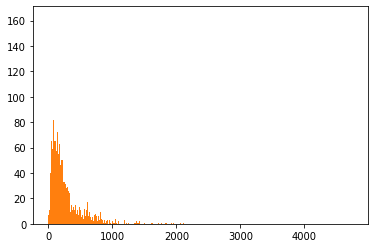

In [192]:
x = plt.hist(vocab_freq,bins=4569)[0][:100]
y = plt.hist(vocab_freq,bins=4569)[1][:100]

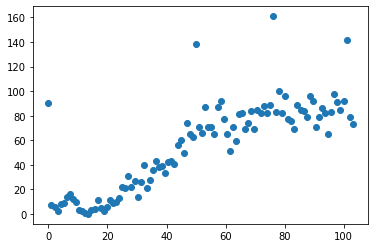

In [193]:
plt.scatter(y,x)

# Remove unnecessary words

### TF-IDF

In [116]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [134]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer

In [150]:
import matplotlib.pyplot as plt

### IDF

In [117]:
into_one_list = [" ".join(x) for x in report_2018['Total']]

In [140]:
#instantiate CountVectorizer() 
cv=CountVectorizer() 
 
# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(into_one_list)

In [141]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [143]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

,idf_weights
연구,1.154867
정책,1.396404
분석,1.436759
필요,1.521653
방안,1.592618
...,...
생명헌법,10.245128
생명표,10.245128
생명자원보전법,10.245128
생명의,10.245128


In [165]:
top_100 = df_idf.sort_values(by=['idf_weights'])[:100]

(array([ 1.,  0.,  0.,  1.,  1.,  1.,  2.,  0.,  3.,  2.,  2.,  6.,  7.,
         9.,  6.,  7., 10., 23.,  5., 14.]),
 array([1.15486725, 1.22265235, 1.29043746, 1.35822256, 1.42600767,
        1.49379277, 1.56157788, 1.62936298, 1.69714809, 1.76493319,
        1.8327183 , 1.9005034 , 1.96828851, 2.03607362, 2.10385872,
        2.17164383, 2.23942893, 2.30721404, 2.37499914, 2.44278425,
        2.51056935]),
 <BarContainer object of 20 artists>)

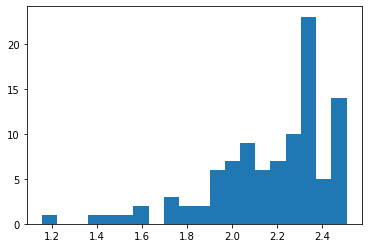

In [167]:
plt.hist([x for x in top_100['idf_weights'][:100]],bins=20)

In [252]:
df_idf.sort_values(by=['idf_weights'])[:40]

,idf_weights
연구,1.154867
정책,1.396404
분석,1.436759
필요,1.521653
방안,1.592618
관련,1.612199
제시,1.728235
사회,1.749363
목적,1.757879
결과,1.777861


### TF-IDF

In [118]:
vectorizer = TfidfVectorizer()

In [119]:
X = vectorizer.fit_transform(into_one_list)

In [120]:
tfidf_tokens = vectorizer.get_feature_names()

In [121]:
df_tfidfvect = pd.DataFrame(data = X.toarray(),columns = tfidf_tokens,index=report_2018.index)

In [253]:
df_tfidfvect

,3대혁명,6급이하,6플랫폼,lk,n드라이브,s년간,t식,對미얀,가i기,가가,...,힌두교,힌트,힐러리,힐링,힐본,힐튼,힘겨루기,힘추구,힙입어,힙합
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Checking words consist of only one character

In [130]:
one_word = [i for i in tfidf_tokens if len(i)<2]
one_word

[]

nothing

Text(0.5, 1.0, 'research')

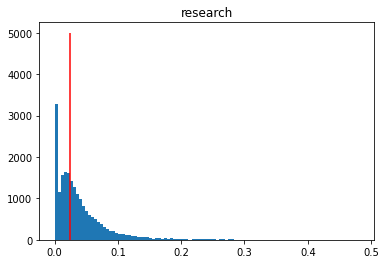

In [242]:
plt.hist([x for x in df_tfidfvect['연구']],bins=100)
plt.vlines(0.025,0,5000,colors='r')
plt.title('research')

Text(0.5, 1.0, 'Main')

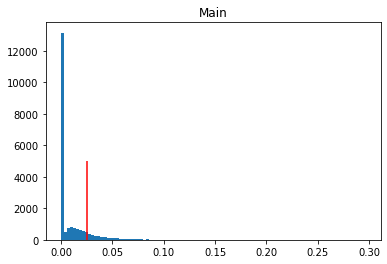

In [243]:
plt.hist([x for x in df_tfidfvect['주요']],bins=100)
plt.vlines(0.025,0,5000,colors='r')
plt.title('Main')

Text(0.5, 1.0, 'Science')

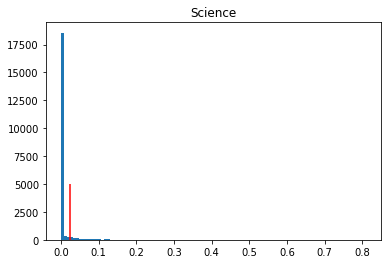

In [251]:
plt.hist([x for x in df_tfidfvect['과학']],bins=100)
plt.vlines(0.025,0,5000,colors='r')
plt.title('Science')

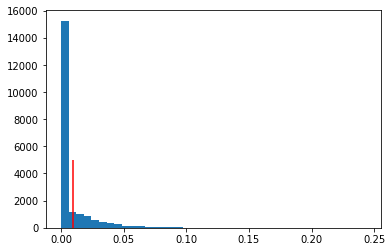

In [193]:
plt.hist([x for x in df_tfidfvect['파악']],bins=40)
plt.vlines(0.01,0,5000,colors='r')

(array([2.0706e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.        , 0.00056611, 0.00113223, 0.00169834, 0.00226445,
        0.00283057, 0.00339668, 0.00396279, 0.00452891, 0.00509502,
        0.00566113, 0.00622725, 0.00679336, 0.00735947, 0.00792559,
        0.0084917 , 0.00905781, 0.00962393, 0.01019004, 0.01075615,
        0.01132226, 0.01188838, 0.01245449, 0.0130206 , 0.01358672,
        0.01415283, 0.01471894, 0.01528506, 0.01585117, 0.01641728,
        0.0169834 , 0.01754951, 0.01811562, 0.

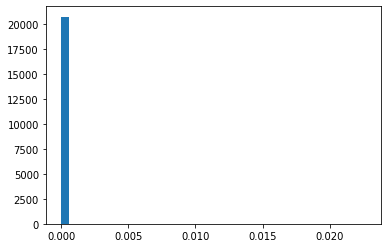

In [191]:
plt.hist([x for x in df_tfidfvect['힙합']],bins=40)

### Eliminate words whose tf-idf lower than threshold = 0.025

In [255]:
report_2018

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords,Total
0,"[세기, 생물, 산업, 창조, 일본, 정부, 기본, 전략, 프로젝트]",NaN,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,"[지금, 경제, 구조, 변혁, 창조, 행동, 계획, 각료회, 결정, 라이프사이언스,...","바이오테크놀로지산업,21세기,생물산업,창조,일본 정부,기본전략,프로젝트","[세기, 생물, 산업, 창조, 일본, 정부, 기본, 전략, 프로젝트, 지금, 경제,..."
1,"[연구, 개발, 정책, 동향]",R&D Policy Trends in the EU,과학기술정책연구원,2000,기본연구보고서,과학기술,과학기술일반,정성철,과학기술정책연구원,NaN,NaN,NaN,0,0,"[미국, 일본, 세계, 과학, 기술, 발전, 주도, 국가군, 연구, 개발, 투자, ...","EU,연구개발,정책동향","[연구, 개발, 정책, 동향, 미국, 일본, 세계, 과학, 기술, 발전, 주도, 국..."
2,"[관련, 개념, 적용, 조건]",NaN,과학기술정책연구원,2000,기본연구보고서,경제,예산,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,"[세계, 시장, 경쟁, 환경, 심화, 국가, 경쟁력, 노력, 가속, 시작, 선진국,...","PBS,개념,적용조건","[관련, 개념, 적용, 조건, 세계, 시장, 경쟁, 환경, 심화, 국가, 경쟁력, ..."
3,"[평가, 시스템, 이론, 체계, 구축, 적용, 방안, 연구]",A Framework for R&D Evaluation System and Its ...,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,이정원,과학기술정책연구원,NaN,NaN,NaN,0,0,"[연구, 연구, 개발, 활동, 연구, 개발, 평가, 자체, 효율, 결과, 효과, 연...","R&D 평가시스템,이론적 체계 구축,적용방안","[평가, 시스템, 이론, 체계, 구축, 적용, 방안, 연구, 연구, 연구, 개발, ..."
4,"[개방, 모듈, 기술, 패러다임, 대응, 기술, 혁신, 전략, 리눅스, 중심]",NaN,과학기술정책연구원,2000,기본연구보고서,방송·통신·정보,정보,송위진,과학기술정책연구원,NaN,NaN,NaN,0,0,"[인터넷, 발전, 리눅스, 확산, 기술, 개발, 환경, 개방, 모듈, 구조, 변화,...","개방형·모듈형,기술패러다임,기술혁신,리눅스","[개방, 모듈, 기술, 패러다임, 대응, 기술, 혁신, 전략, 리눅스, 중심, 인터..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21579,"[생태, 공학, 기법, 활용, 지역, 단위, 생태, 보호, 지역, 확대, 방안]",Prioritizing ecologically important areas for ...,한국환경정책평가연구원,2018,기본연구보고서,환경,환경일반,구경아,한국환경정책평가연구원,NaN,NaN,NaN,"[오일찬, 박선욱, 이현우, 홍현정]",0,"[연구, 다양, 생태, 보전, 생물, 다양, 보전, 증진, 생태, 지속, 가능, 이...","보호지역, 국립공원, 생태공학, 지역 생태계, 토지이용변화, 제주도","[생태, 공학, 기법, 활용, 지역, 단위, 생태, 보호, 지역, 확대, 방안, 연..."
21580,"[가뭄, 지역, 농촌, 용수, 개발, 계획, 전략, 환경, 영향, 평가, 개선, 방...",Improving effectiveness of strategic environme...,한국환경정책평가연구원,2018,기본연구보고서,환경,환경일반,김경호,한국환경정책평가연구원,NaN,NaN,NaN,"[박종윤, 하지연, 안준영, 이후승]",0,"[연구, 가뭄, 지역, 농촌, 용수, 개발, 계획, 친환경, 지속, 가능, 이수, ...","전략환경영향평가, 농촌용수 개발계획, 지하수-지표수 복합이용, 저수지(소규모 댐),...","[가뭄, 지역, 농촌, 용수, 개발, 계획, 전략, 환경, 영향, 평가, 개선, 방..."
21581,"[원자력, 시설, 해체, 부지, 사, 환경, 관리, 전략, 토양, 지하수, 분야, 중심]",Environmental strategy for site reuse of decom...,한국환경정책평가연구원,2018,기본연구보고서,환경,환경일반,신경희,한국환경정책평가연구원,NaN,NaN,NaN,"[이희선, 권진경, 조공장, 김경호, 양경]",0,"[고리, 호기, 영구, 정지, 해체, 확정, 월성, 기, 조기, 폐쇄, 결정, 추가...","원자력시설, 해체, 재사용, 환경관리, 토양·지하수","[원자력, 시설, 해체, 부지, 사, 환경, 관리, 전략, 토양, 지하수, 분야, ..."
21582,"[중소, 물환경, 개선, 용배수, 관리, 활용, 방안]",Management policy of irrigation and drainage c...,한국환경정책평가연구원,2018,기본연구보고서,환경,수질오염,김익재,한국환경정책평가연구원,NaN,NaN,NaN,"[박종윤, 곽효은, 김교범]",0,"[그동안, 우리나라, 하천, 관리, 재정, 투자, 대하천, 위주, 추진, 대하천, ...","중소하천, 물환경, 용수로, 배수로, 농업용수, 비점오염수질부하, 물관리 일원화","[중소, 물환경, 개선, 용배수, 관리, 활용, 방안, 그동안, 우리나라, 하천, ..."


In [262]:
df_tfidfvect

,3대혁명,6급이하,6플랫폼,lk,n드라이브,s년간,t식,對미얀,가i기,가가,...,힌두교,힌트,힐러리,힐링,힐본,힐튼,힘겨루기,힘추구,힙입어,힙합
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# delete words 
after_abstract = []
for i in tqdm(report_2018.index):
    temp_doc = df_tfidfvect.loc[i]
    del_word_list = [x for x in temp_doc[temp_doc<0.025].index]
    
    after_abstract.append(list(filter(lambda a: a not in del_word_list, report_2018['Abstract'][i])))

 49%|████▉     | 10245/20707 [1:46:58<47:41,  3.66it/s]  

In [294]:
len(after_abstract)

20707

In [295]:
report_2018['Abstract'] = after_abstract

/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [296]:
report_2018

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords,Total
0,"[세기, 생물, 산업, 창조, 일본, 정부, 기본, 전략, 프로젝트]",NaN,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,"[지금, 경제, 구조, 변혁, 창조, 행동, 계획, 각료회, 결정, 라이프사이언스,...","바이오테크놀로지산업,21세기,생물산업,창조,일본 정부,기본전략,프로젝트","[세기, 생물, 산업, 창조, 일본, 정부, 기본, 전략, 프로젝트, 지금, 경제,..."
1,"[연구, 개발, 정책, 동향]",R&D Policy Trends in the EU,과학기술정책연구원,2000,기본연구보고서,과학기술,과학기술일반,정성철,과학기술정책연구원,NaN,NaN,NaN,0,0,"[미국, 일본, 세계, 과학, 기술, 발전, 주도, 국가군, 연구, 개발, 투자, ...","EU,연구개발,정책동향","[연구, 개발, 정책, 동향, 미국, 일본, 세계, 과학, 기술, 발전, 주도, 국..."
2,"[관련, 개념, 적용, 조건]",NaN,과학기술정책연구원,2000,기본연구보고서,경제,예산,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,"[세계, 시장, 경쟁, 환경, 심화, 국가, 경쟁력, 노력, 가속, 시작, 선진국,...","PBS,개념,적용조건","[관련, 개념, 적용, 조건, 세계, 시장, 경쟁, 환경, 심화, 국가, 경쟁력, ..."
3,"[평가, 시스템, 이론, 체계, 구축, 적용, 방안, 연구]",A Framework for R&D Evaluation System and Its ...,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,이정원,과학기술정책연구원,NaN,NaN,NaN,0,0,"[연구, 연구, 개발, 활동, 연구, 개발, 평가, 자체, 효율, 결과, 효과, 연...","R&D 평가시스템,이론적 체계 구축,적용방안","[평가, 시스템, 이론, 체계, 구축, 적용, 방안, 연구, 연구, 연구, 개발, ..."
4,"[개방, 모듈, 기술, 패러다임, 대응, 기술, 혁신, 전략, 리눅스, 중심]",NaN,과학기술정책연구원,2000,기본연구보고서,방송·통신·정보,정보,송위진,과학기술정책연구원,NaN,NaN,NaN,0,0,"[인터넷, 발전, 리눅스, 확산, 기술, 개발, 환경, 개방, 모듈, 구조, 변화,...","개방형·모듈형,기술패러다임,기술혁신,리눅스","[개방, 모듈, 기술, 패러다임, 대응, 기술, 혁신, 전략, 리눅스, 중심, 인터..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21579,"[생태, 공학, 기법, 활용, 지역, 단위, 생태, 보호, 지역, 확대, 방안]",Prioritizing ecologically important areas for ...,한국환경정책평가연구원,2018,기본연구보고서,환경,환경일반,구경아,한국환경정책평가연구원,NaN,NaN,NaN,"[오일찬, 박선욱, 이현우, 홍현정]",0,"[연구, 다양, 생태, 보전, 생물, 다양, 보전, 생태, 이용, 우리나라, 생태,...","보호지역, 국립공원, 생태공학, 지역 생태계, 토지이용변화, 제주도","[생태, 공학, 기법, 활용, 지역, 단위, 생태, 보호, 지역, 확대, 방안, 연..."
21580,"[가뭄, 지역, 농촌, 용수, 개발, 계획, 전략, 환경, 영향, 평가, 개선, 방...",Improving effectiveness of strategic environme...,한국환경정책평가연구원,2018,기본연구보고서,환경,환경일반,김경호,한국환경정책평가연구원,NaN,NaN,NaN,"[박종윤, 하지연, 안준영, 이후승]",0,"[연구, 가뭄, 지역, 농촌, 용수, 개발, 계획, 친환경, 지속, 이수, 방안, ...","전략환경영향평가, 농촌용수 개발계획, 지하수-지표수 복합이용, 저수지(소규모 댐),...","[가뭄, 지역, 농촌, 용수, 개발, 계획, 전략, 환경, 영향, 평가, 개선, 방..."
21581,"[원자력, 시설, 해체, 부지, 사, 환경, 관리, 전략, 토양, 지하수, 분야, 중심]",Environmental strategy for site reuse of decom...,한국환경정책평가연구원,2018,기본연구보고서,환경,환경일반,신경희,한국환경정책평가연구원,NaN,NaN,NaN,"[이희선, 권진경, 조공장, 김경호, 양경]",0,"[호기, 영구, 정지, 해체, 기, 국내, 원전, 예정, 원전, 해체, 해체, 개념...","원자력시설, 해체, 재사용, 환경관리, 토양·지하수","[원자력, 시설, 해체, 부지, 사, 환경, 관리, 전략, 토양, 지하수, 분야, ..."
21582,"[중소, 물환경, 개선, 용배수, 관리, 활용, 방안]",Management policy of irrigation and drainage c...,한국환경정책평가연구원,2018,기본연구보고서,환경,수질오염,김익재,한국환경정책평가연구원,NaN,NaN,NaN,"[박종윤, 곽효은, 김교범]",0,"[하천, 관리, 재정, 대하천, 위주, 대하천, 본류, 정책, 조류, 미량오염물질,...","중소하천, 물환경, 용수로, 배수로, 농업용수, 비점오염수질부하, 물관리 일원화","[중소, 물환경, 개선, 용배수, 관리, 활용, 방안, 그동안, 우리나라, 하천, ..."
